<a href="https://colab.research.google.com/github/heidilyu/Advanced-Calculus-/blob/main/Lab_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2.1

Goals:
* Use arrays to compute approximations of integrals.
* Use graphs and formulas to bound the error of these approximations.
* Understand how the actual error is related to the error bound, and how the shape of the function affects that relationship.
* Use flow-control and the rectangle method to visualize integral approximations.

### Instructions
* With your group, work through each of the questions below.  Most questions include some discussion and some bullet-pointed instructions.  Make sure you carry out the bullet-pointed instructions, because that it what is graded.  
* You are expected to collaborate with your group.  You should arrive at the answers to these questions together.  However, your submitted answers should be expressed in your own words.
* If you need to pause, you can save and come back to your work later.  
* When you are done, select "download .ipynb" from the file menu.  Save the ipynb to your computer, then upload it to the Lab assignment in gradescope.


We will begin by importing the libraries we use for graphing.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

Define five algebraic functions by running this cell.  Each person in your group should pick a different one of these functions.  For the rest of the lab, $f(x)$ refers to the function you picked.

In [3]:
def f1(x):
  return x**3 - 6*x**2 + 14*x - 6
  # actual integral: 108.75

def f2(x):
  return -x**3 + 6*x**2 - 4*x + 20
  # actual integral: 136.25

def f3(x):
  return -2*x**3 + 24*x**2 - 80*x + 100
  # actual integral: 172.5

def f4(x):
  return x**4 - 16*x**3 + 96*x**2 - 264*x +300
  # actual integral: 135

def f5(x):
  return -x**3 + 12*x**2 - 57*x + 130
  # actual integral: 188.75

Hao chosee f5

---


We'll be computing left-hand approximations of $\int_1^6 f(x)~dx$ (where $f$ is your function).

### Q1

* Copy your left-hand approximation code from Exercise 2 of the pre-lab.  
* Modify it to use your function, instead of `f()` (or you can redefine `f()` to be your function),
* Run your code to produce the $L_{10}$ approximation of the integral of your function from 1 to 6.


In [17]:
n = 10
a = 1
b = 6

deltax = (b-a)/n

x = np.arange(a, b, deltax)


def f(x):
  return -x**3 + 12*x**2 - 57*x + 130

left = f(x) * deltax

print(np.sum(left))


209.0625


### Q2


* Define a function `df(x)` which returns the derivative $f'(x)$ at `x`.
* Graph $f(x)$ and $f'(x)$.

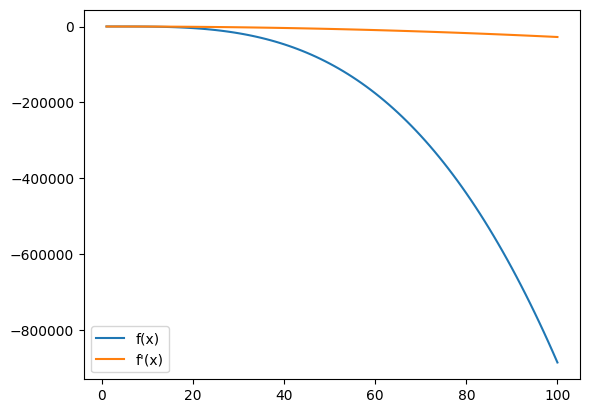

In [18]:

def df(x):
  return -3*x**2 + 24*x - 57

x_vals = np.linspace(1, 100, 100)
y_vals = f(x_vals)
dy_vals = df(x_vals)

plt.plot(x_vals, y_vals, label='f(x)')
plt.plot(x_vals, dy_vals, label='f\'(x)')
plt.legend()
plt.show()

### Q3

* Look at your graph in Q2.  What bound $S$ can you put on $|f'(x)|$ over the interval $[1,6]$.
* Use $S$ to compute the theoretical error bound of the $L_{10}$ approximation. Look up the formula if you need it.  Since it's good practice, input the arithmetic for this formula into a code cell and compute it there.

In [19]:
S = np.max(np.abs(dy_vals))
print("S=", S)

error_bound = S * (b-a)**2/(2*n)
print("Error bound:", error_bound)



S= 27657.0
Error bound: 34571.25


### Q4

How does the error bound relate to the actual error?  
* Compute $L_{100}$ and $L_{1000}$ approximations of $\int_1^6 f(x)~dx$.  You can reuse your work from Q1.
* The actual value of $\int_1^6 f(x)~dx$ is in a comment in the code cell that defined the five functions.  Compute the actual error of your $L_{10}$, $L_{100}$ and $L_{1000}$ approximations.
* Compute the theoretical error bound of each approximation.
* What percentage of the theoretical error bound is each actual error?
* How does the number of rectangles appear to affect the percentages you computed?  Compare your data to your group-mates and make a general observation, containing specific references to their data.


In [30]:
# compute L100

n = 100
a = 1
b = 6
actual = 188.75
x_vals = np.linspace(1, 6, 100)

def f(x):
  return -x**3 + 12*x**2 - 57*x + 130
  # actual integral: 188.75

def df(x):
  return -3*x**2 + 24*x - 57

def formula(n, a, b, actual, x_vals):
  deltax = (b-a)/n
  x = np.arange(a, b, deltax)
  approx = np.sum(f(x) * deltax)

  S = np.max(np.abs(df(x_vals)))
  error_bound = S * (b-a)**2/(2*n)

  actual_error = abs(approx - actual)

  percent_bound = (actual_error/error_bound) * 100

  return approx, error_bound, actual_error, percent_bound


for n in [10, 100, 1000]:
  approx, error_bound, actual_error, percent_bound = formula(n, a, b, actual, x_vals)
  print('L = ', approx)
  print('Error bound = ', error_bound)
  print('Actual error = ', actual_error)
  print('Percent bound = ', percent_bound)


L =  209.0625
Error bound =  45.0
Actual error =  20.3125
Percent bound =  45.13888888888889
L =  190.75312499999987
Error bound =  4.5
Actual error =  2.0031249999998693
Percent bound =  44.51388888888598
L =  188.95003125000358
Error bound =  0.45
Actual error =  0.20003125000357613
Percent bound =  44.451388889683585


### Q5

Some functions have an actual error $E_L$ that is a relatively large percentage of the theoretical bound.  Others have $E_L$ that is much smaller than the theoretical bound.  This is our main question:  

> What properties of a function make the actual error $E_L$ a larger or smaller percentage of the theoretical error bound?

* In a text cell, compare your percentages to that of your groupmates, specifically referencing their data.  
* Come up with a conjecture about what properties of your graphs cause the actual error to be a larger or smaller percentage of the theoretical error bound.  
* For full credit, give a plausible mathematical reason why your conjecture might be true.






In [ ]:
f'(x)' large

how bad the theoretical error is
how bad the estimate of the first derivative is

how the first derivative changes
the value of the second derivative



### Q6

* Copy your code to display the rectangles of the $L_{10}$ approximation of $$\int_1^6 x^2~dx$$ from Exercise 7 of the pre-lab into a code cell below.
* Modify as necessary to use your function instead.
* Run the code to show a plot of your function and the 10 rectangles of the approximation.